In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
df = pd.read_csv("C:/Users/ASUS/Downloads/Coffee Shop Sales.xlsx - Transactions (2).csv")
print(df)

        transaction_id transaction_date transaction_time  transaction_qty  \
0                    1         1/1/2023          7:06:11                2   
1                    2         1/1/2023          7:08:56                2   
2                    3         1/1/2023          7:14:04                2   
3                    4         1/1/2023          7:20:24                1   
4                    5         1/1/2023          7:22:41                2   
...                ...              ...              ...              ...   
149111          149452        6/30/2023         20:18:41                2   
149112          149453        6/30/2023         20:25:10                2   
149113          149454        6/30/2023         20:31:34                1   
149114          149455        6/30/2023         20:57:19                1   
149115          149456        6/30/2023         20:57:19                2   

        store_id   store_location  product_id  unit_price    product_catego

In [4]:
print(df.head())

   transaction_id transaction_date transaction_time  transaction_qty  \
0               1         1/1/2023          7:06:11                2   
1               2         1/1/2023          7:08:56                2   
2               3         1/1/2023          7:14:04                2   
3               4         1/1/2023          7:20:24                1   
4               5         1/1/2023          7:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1                 Tea   
2         5  Lower Manhattan          59         4.5  Drinking Chocolate   
3         5  Lower Manhattan          22         2.0              Coffee   
4         5  Lower Manhattan          57         3.1                 Tea   

            product_type               product_detail  
0  Gourmet brewed coffee                  Ethiopia Rg 

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB
None


In [6]:
print(df.describe())

       transaction_id  transaction_qty       store_id     product_id  \
count   149116.000000    149116.000000  149116.000000  149116.000000   
mean     74737.371872         1.438276       5.342063      47.918607   
std      43153.600016         0.542509       2.074241      17.930020   
min          1.000000         1.000000       3.000000       1.000000   
25%      37335.750000         1.000000       3.000000      33.000000   
50%      74727.500000         1.000000       5.000000      47.000000   
75%     112094.250000         2.000000       8.000000      60.000000   
max     149456.000000         8.000000       8.000000      87.000000   

          unit_price  
count  149116.000000  
mean        3.382219  
std         2.658723  
min         0.800000  
25%         2.500000  
50%         3.000000  
75%         3.750000  
max        45.000000  


In [7]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64


In [8]:
df.dropna(inplace=True)

# Data Cleaning and Feature Engineering

**Analysis:**

1) The dataset provides insights into the different store locations and products available, helping us understand the variety of data we are working with.
2) The addition of the Revenue column allows us to analyze sales more effectively by considering both quantity and unit price. 
3) Extracting the day and hour from the transaction date enables a deeper analysis of purchasing patterns based on time, which could reveal peak sales hours and popular days for shopping. 
4) The cleaned dataset sample shows that the necessary transformations (like datetime conversion and revenue calculation) have been applied correctly.

In [11]:
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
print("\nStore Locations:\n", df['store_location'].unique())
print("\nProducts:\n", df['product_id'].unique())
df['Revenue'] = df['transaction_qty'] * df['unit_price']
df['Day'] = df['transaction_date'].dt.day_name()
df['Hour'] = df['transaction_date'].dt.hour
print("\nCleaned DataFrame Sample:\n", df.head())


Store Locations:
 ['Lower Manhattan' "Hell's Kitchen" 'Astoria']

Products:
 [32 57 59 22 77 28 39 58 56 33 51 87 47 79 42 61 69 40 43 76 45 71 38 26
 27 29 54 55 24 60 78 44 48 23 46 25 34 36 74 53 41 37 50 72 35 70 73 75
 31 49 52 30 64 12 63  6  9 65 84 19  7  1 17 10  4 15 16  3 20 83 18 21
 13 11  5  2 81 14  8 82]

Cleaned DataFrame Sample:
    transaction_id transaction_date transaction_time  transaction_qty  \
0               1       2023-01-01          7:06:11                2   
1               2       2023-01-01          7:08:56                2   
2               3       2023-01-01          7:14:04                2   
3               4       2023-01-01          7:20:24                1   
4               5       2023-01-01          7:22:41                2   

   store_id   store_location  product_id  unit_price    product_category  \
0         5  Lower Manhattan          32         3.0              Coffee   
1         5  Lower Manhattan          57         3.1            

# To Compare the Sales Performance of Different Store Locations

**Focus:**
This analysis focuses on revenue.

**Analysis:**

1) The bar chart clearly shows the total revenue generated by each store location, allowing quick identification of the highest and lowest-performing stores.  
2) Some store locations significantly outperform others, suggesting that certain areas may have higher demand or customer traffic. 
3) The variation in revenue between stores highlights potential opportunities for targeted marketing or product promotions in lower-performing stores.  
4) The bar chart format makes it easy to spot trends and potential outliers in store performance across the locations.

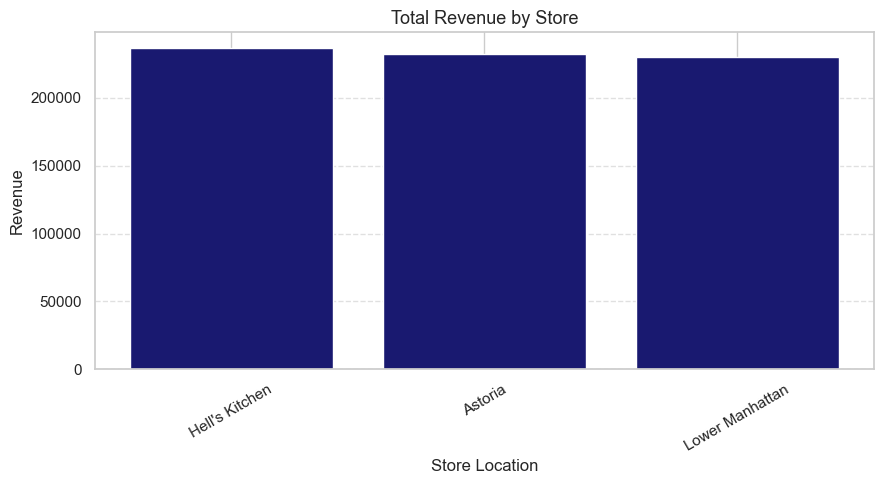

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load and clean the dataset
df = pd.read_csv("C:/Users/ASUS/Downloads/Coffee Shop Sales.xlsx - Transactions (2).csv")
df.dropna(inplace=True)
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['Revenue'] = df['transaction_qty'] * df['unit_price']

# Step 3: Group and plot revenue by store location
revenue_by_store = df.groupby('store_location')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(9, 5))
bars = plt.bar(revenue_by_store.index, revenue_by_store.values, color='midnightblue')
plt.title("Total Revenue by Store", fontsize=13)
plt.xlabel("Store Location")
plt.ylabel("Revenue")
plt.xticks(rotation=30)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# To Identify the Top-Selling Products in Each Store Location.

**Focus:**
This analysis focuses on transaction quantity.

**Analysis:**

1) The boxplot reveals the distribution of transaction quantities for the top 5 selling products across different store locations. 
2) Certain store locations show a wider range of transaction quantities, indicating more variability in product sales.
3) Some products consistently perform better in specific locations, while others have more equal performance across stores.
4) Outliers in the data suggest that some store locations experience unusually high or low sales for certain products.

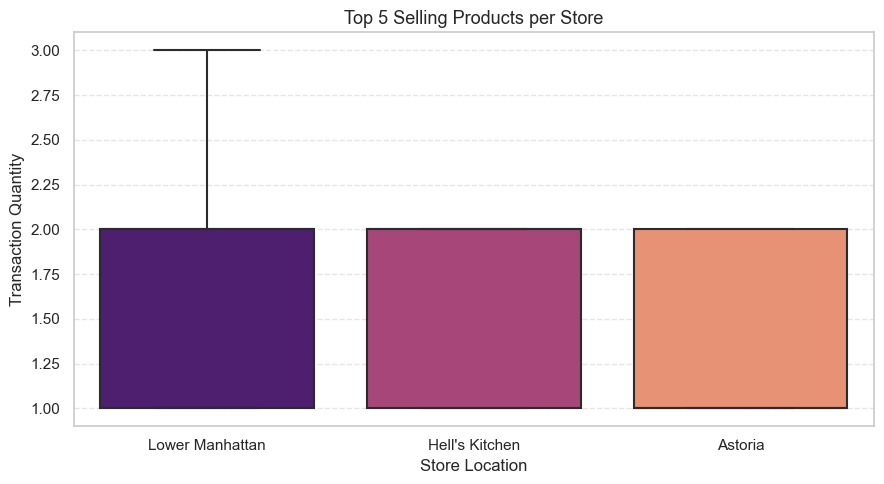

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

top5 = df.groupby('product_id')['transaction_qty'].sum().nlargest(5).index
top5_df = df[df['product_id'].isin(top5)]

plt.figure(figsize=(9, 5))
sns.boxplot(data=top5_df, x='store_location', y='transaction_qty', palette='magma')
plt.title("Top 5 Selling Products per Store", fontsize=13)
plt.xlabel("Store Location")
plt.ylabel("Transaction Quantity")
plt.tight_layout()
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()


# To Analyze the Purchasing Patterns of Customers Over Time

**Focus:**
This chart focuses on revenue over time.

**Analysis:**

1) The graph shows clear revenue trends over time for each store location, helping to identify peak sales periods and low-sales months.
2) Some store locations may show consistent growth, while others exhibit fluctuations or seasonal dips in revenue.
3) The line plot enables easy comparison between store locations, revealing which stores perform better during specific months or seasons.
4) The graph provides insights into the purchasing patterns of customers, which can inform inventory and marketing strategies for future periods.

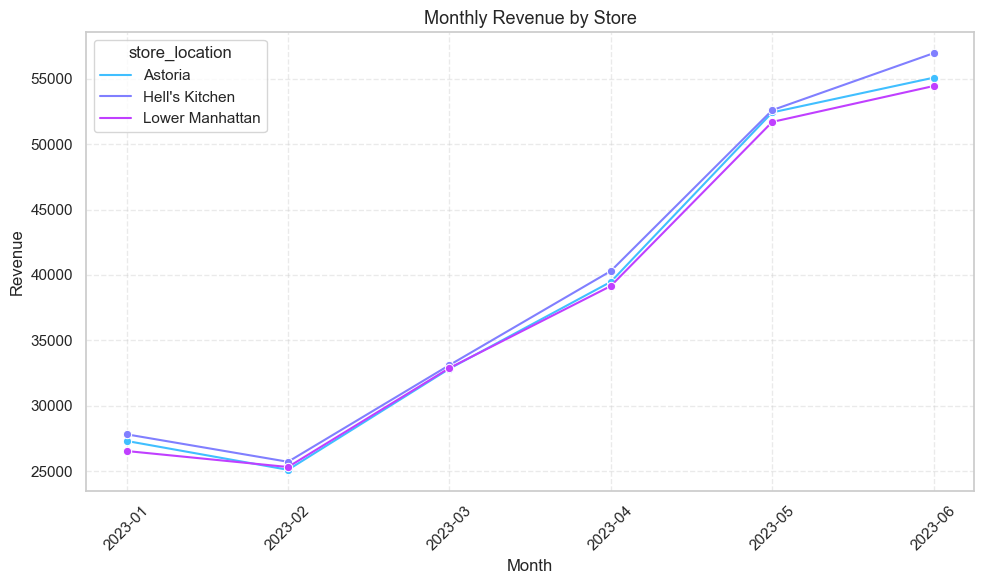

In [16]:
df['Month'] = df['transaction_date'].dt.to_period("M").astype(str)
monthly_sales = df.groupby(['Month', 'store_location'])['Revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Revenue', hue='store_location', marker='o', palette='cool')
plt.title("Monthly Revenue by Store", fontsize=13)
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# To Determine the Peak Sales Hours and Days of the Week

**Focus:**
This analysis focuses on daily revenue and its variation.

**Analysis:**

1) The histogram shows the distribution of daily revenue, helping us identify how frequently certain revenue levels occur.
2) A higher frequency at certain revenue ranges may indicate consistent sales on specific days.
3) The spread of the data suggests some days have significantly higher revenue, while others have much lower sales, which could help in identifying peak and off-peak sales periods.
4) The gridlines and histogram bins offer a clear view of revenue distribution, making it easier to identify trends or outliers in daily sales.

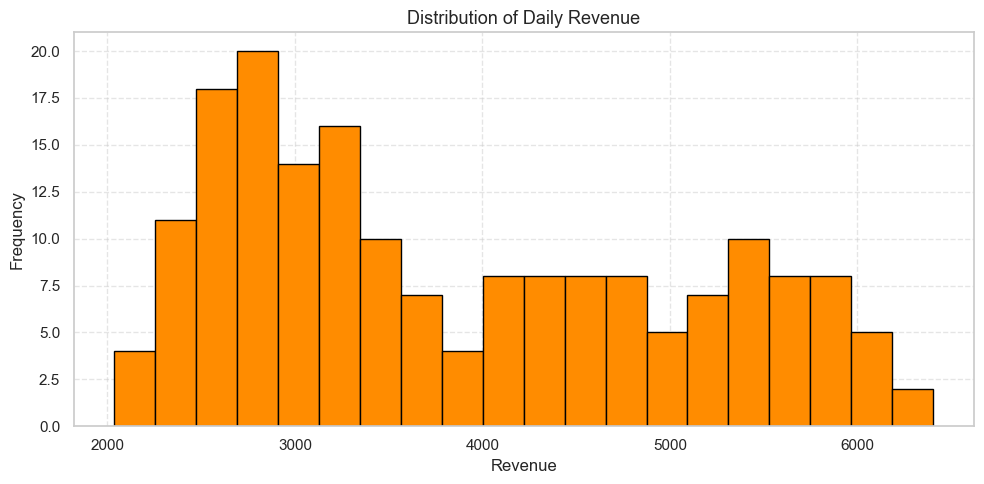

In [17]:
daily_revenue = df.groupby('transaction_date')['Revenue'].sum()

plt.figure(figsize=(10, 5))
plt.hist(daily_revenue, bins=20, color='darkorange', edgecolor='black')
plt.title("Distribution of Daily Revenue", fontsize=13)
plt.xlabel("Revenue")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# To Compare the Sales Performance of Different Store Locations Across Months

**Focus:**
This visual emphasizes monthly revenue distribution per store using a heatmap.

**Analysis:**

1) The heatmap shows the variation in revenue by store location across different months, with brighter colors representing higher revenue.
2) Some store locations exhibit consistently high sales throughout the months, while others may have fluctuations, possibly due to seasonality or other factors.
3) The heatmap allows for a quick and easy comparison of store performance over time, highlighting peak revenue months for each store.
4) The annotated values on the heatmap provide precise revenue details, enabling detailed analysis of revenue performance across locations and months.

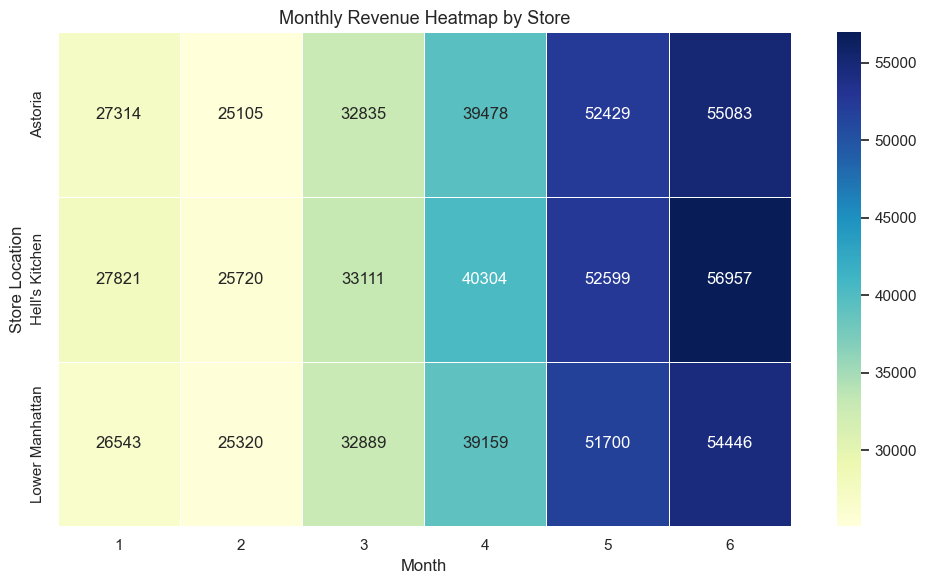

In [19]:
pivot_data = df.pivot_table(index='store_location', columns=df['transaction_date'].dt.month, values='Revenue', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, cmap="YlGnBu", linewidths=0.5, linecolor='white', annot=True, fmt=".0f")
plt.title("Monthly Revenue Heatmap by Store", fontsize=13)
plt.xlabel("Month")
plt.ylabel("Store Location")
plt.tight_layout()
plt.show()

# To Analyze the Distribution of Transaction Quantities

**Focus:**
This analysis focuses on transaction quantity to understand how many items are usually sold per transaction.

**Analysis:**

1) The histogram reveals the frequency of various transaction quantities, showing how often different quantities of products are purchased in a transaction.
2) The presence of a peak in the distribution suggests that most transactions have a relatively low quantity, which is typical in many retail environments.
3) The KDE curve helps identify whether the distribution is skewed or symmetric, providing further insights into the purchasing behavior (e.g., whether customers tend to buy more or fewer items per transaction).
4) The spread of the histogram gives insights into how varied the transaction quantities are across different customers or store locations.

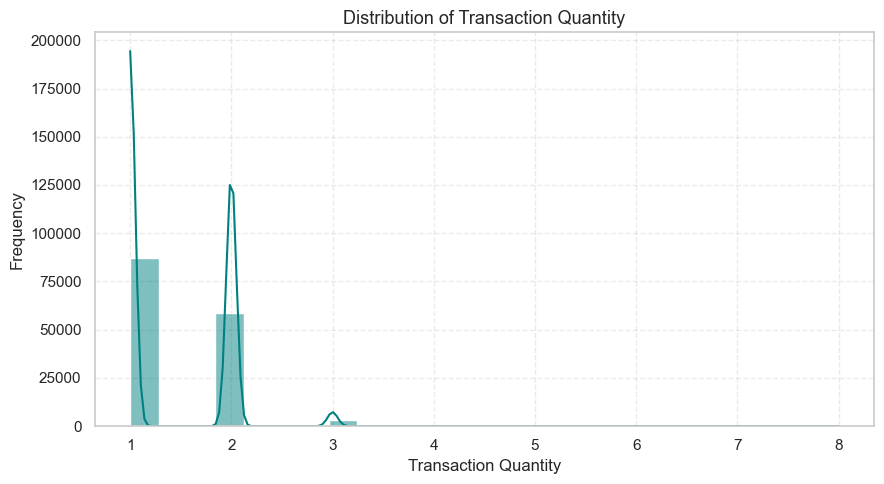

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 5))
sns.histplot(df['transaction_qty'], bins=25, kde=True, color='teal')
plt.title("Distribution of Transaction Quantity", fontsize=13)
plt.xlabel("Transaction Quantity")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# To Determine the Average Number of Items Purchased Per Transaction

**Focus:**
This analysis focuses on average transaction quantity.

**Analysis:**

1) The average number of items purchased per transaction is calculated as 1.44.
2) This number represents the typical purchasing behavior of customers at the store, indicating whether customers are likely to purchase a larger quantity of items or make smaller, more frequent purchases.
3) This analysis can help businesses understand whether they need to adjust inventory levels, promotions, or product offerings based on typical transaction sizes.
4) A higher average transaction quantity may indicate effective bundling strategies or promotions, while a lower average may suggest frequent single-item purchases, prompting the need to revisit upselling techniques.

In [13]:
avg_items = df.groupby('transaction_id')['transaction_qty'].sum().mean()
print(f"\nAverage number of items purchased per transaction: {avg_items:.2f}")


Average number of items purchased per transaction: 1.44


# To Predict Future Demand for Specific Products Based on Historical Sales Data

**Focus:**
This focuses on transaction quantity of the top-selling product over time.

**Analysis:**

1) The graph shows fluctuations in sales volume over different days.
2) Noticeable peaks indicate high-demand periods, which can be useful for forecasting.
3) This visualization helps identify sales cycles, seasonal trends, and potential restocking periods.
4) A consistent upward or downward trend may reflect changing customer preferences or the impact of promotional campaigns.

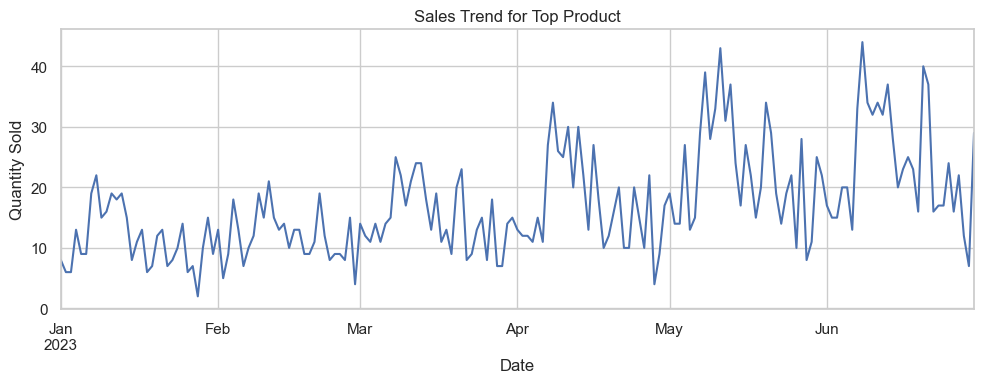

In [13]:
top_product = df['product_id'].value_counts().idxmax()
product_df = df[df['product_id'] == top_product]
time_series = product_df.groupby('transaction_date')['transaction_qty'].sum()
time_series.plot(figsize=(10, 4), title="Sales Trend for Top Product")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.grid(True)
plt.tight_layout()
plt.show()

# To analyze the purchasing patterns of customers over time.

**Focus** :
This visualization focuses on transaction quantity, i.e., the number of items sold.

**Analysis:**

1) The line graph reveals the trend of customer purchases month-over-month.
2) Peaks indicate high customer activity; dips suggest low engagement periods.
3) This insight helps in demand planning and identifying off-peak months for promotional strategies.
4) Unlike revenue-focused graphs, this helps understand actual purchase behavior regardless of price.

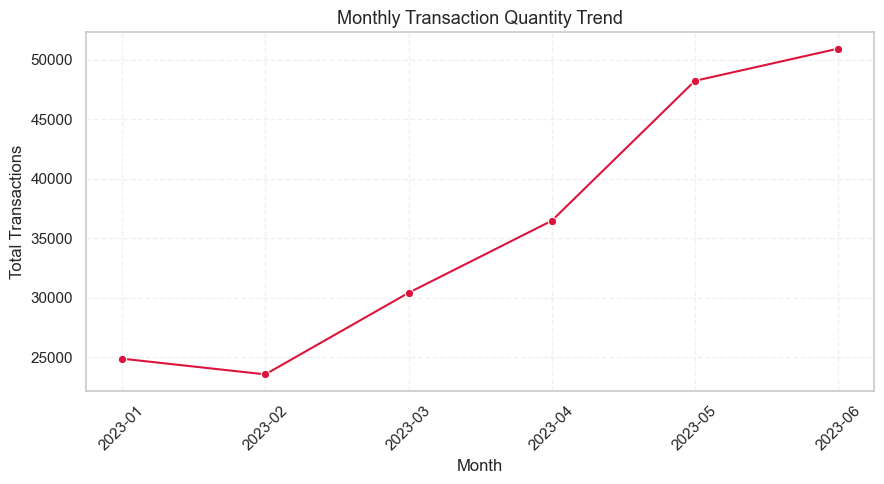

In [21]:
monthly_qty = df.groupby(df['transaction_date'].dt.to_period('M'))['transaction_qty'].sum().reset_index()
monthly_qty['Month'] = monthly_qty['transaction_date'].astype(str)

plt.figure(figsize=(9, 5))
sns.lineplot(data=monthly_qty, x='Month', y='transaction_qty', marker='o', color='crimson')
plt.title("Monthly Transaction Quantity Trend", fontsize=13)
plt.xlabel("Month")
plt.ylabel("Total Transactions")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# To compare the sales performance of different store locations.

**Focus** :
This analysis focuses on store performance by comparing total revenue and the number of sales per store.

**Analysis:**

1) The stores with the highest revenue also show a higher number of sales.
2) Helps identify top-performing stores in terms of both revenue and sales volume.
3) Useful for optimizing inventory and resources across locations based on performance.
4) This comparison can guide marketing and operational strategies to boost performance at weaker locations.

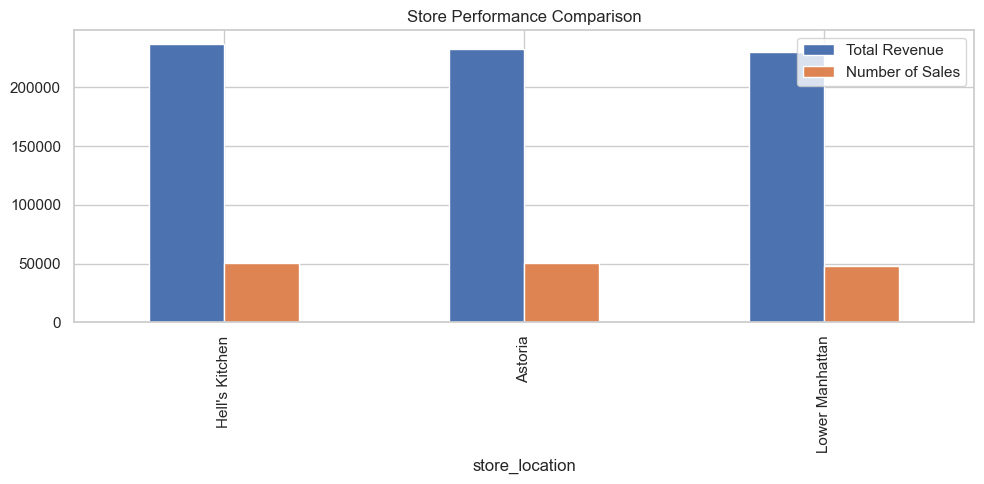

In [16]:
location_stats = df.groupby('store_location')['Revenue'].agg(['sum', 'count']).sort_values(by='sum', ascending=False)
location_stats.rename(columns={'sum': 'Total Revenue', 'count': 'Number of Sales'}, inplace=True)
location_stats.plot(kind='bar', figsize=(10,5), title="Store Performance Comparison")
plt.tight_layout()
plt.show()

# To analyze the purchasing patterns of customers over time (weekdays vs weekends).

**Focus** :
This analysis focuses on revenue distribution between weekdays and weekends.

**Analysis:**

1) The revenue distribution between weekdays and weekends indicates customer buying behavior.
2) If weekends generate a significantly higher portion of revenue, it suggests that customers tend to purchase more during leisure time.
3) This analysis can help adjust store operations, such as staffing and promotions, based on peak revenue days.
4) Weekday vs weekend trends may also inform targeted marketing strategies.

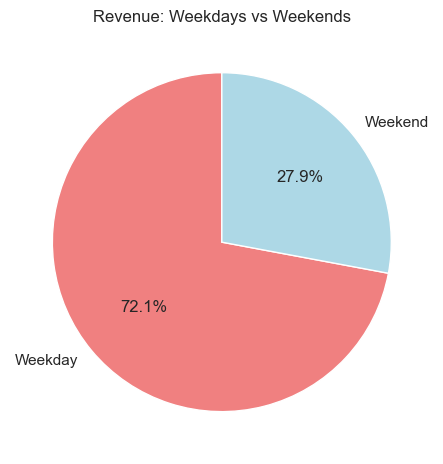

In [17]:
df['Is Weekend'] = df['Day'].isin(['Saturday', 'Sunday'])
weekend_sales = df.groupby('Is Weekend')['Revenue'].sum()
plt.pie(weekend_sales, labels=['Weekday', 'Weekend'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
plt.title("Revenue: Weekdays vs Weekends")
plt.tight_layout()
plt.show()